In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Defining Binary Image Data
# Define binary pixel patterns for A, B, and C (Fkattend into 1D array)
letter_A = np.array([
    0,0,1,1,1,0,
    0,1,0,0,0,1,
    1,0,0,0,0,1,
    1,1,1,1,1,1,
    1,0,0,0,0,1
])

letter_B = np.array([
    1,1,1,1,0,0,
    1,0,0,0,1,0,
    1,1,1,1,0,0,
    1,0,0,0,1,0,
    1,1,1,1,0,0
])

letter_C = np.array([
    0,1,1,1,1,0,
    1,0,0,0,0,1,
    1,0,0,0,0,0,
    1,0,0,0,0,1,
    0,1,1,1,1,0
])


In [15]:
# Defining training data and labels
X_train = np.array([letter_A, letter_B, letter_C])  # Input images
Y_train = np.array([
    [1,0,0],  # Label for A
    [0,1,0],  # Label for B
    [0,0,1]   # Label for C
])


In [21]:
# Defining Neural Network Functions
# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)


In [19]:
# Initialize Network Parameters
input_size = 30  # 5x6 grid flattened
hidden_size = 10 # Hidden layer neurons
output_size = 3  # Three classes (A, B, C)

np.random.seed(42)
weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))

bias_hidden = np.random.uniform(-1, 1, (1, hidden_size))
bias_output = np.random.uniform(-1, 1, (1, output_size))

In [23]:
# Train the Neural Network Using Backpropagation
epochs = 5000
learning_rate = 0.1

loss_history = []

for epoch in range(epochs):
    # Forward Pass
    hidden_input = np.dot(X_train, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)

    # Compute Loss
    loss = np.mean((Y_train - final_output) ** 2)
    loss_history.append(loss)

    # Backpropagation
    error_output = Y_train - final_output
    delta_output = error_output * sigmoid_derivative(final_output)

    error_hidden = np.dot(delta_output, weights_hidden_output.T)
    delta_hidden = error_hidden * sigmoid_derivative(hidden_output)

    # Update Weights and Biases
    weights_hidden_output += np.dot(hidden_output.T, delta_output) * learning_rate
    bias_output += np.sum(delta_output, axis=0, keepdims=True) * learning_rate

    weights_input_hidden += np.dot(X_train.T, delta_hidden) * learning_rate
    bias_hidden += np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate

    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.5f}")


Epoch 0: Loss = 0.22632
Epoch 1000: Loss = 0.00266
Epoch 2000: Loss = 0.00117
Epoch 3000: Loss = 0.00074
Epoch 4000: Loss = 0.00053


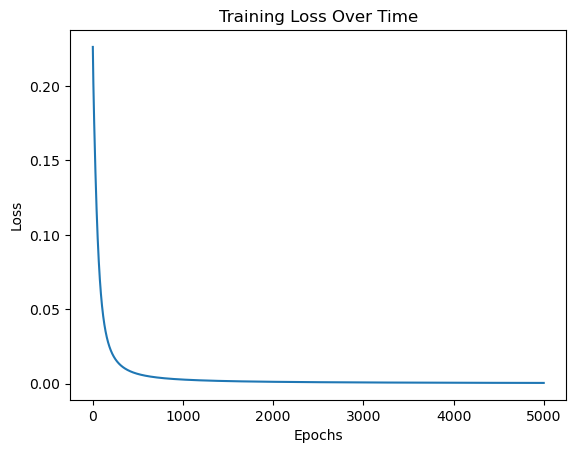

In [25]:
# Plotting Loss Curve
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.show()

Predicted Letter: A


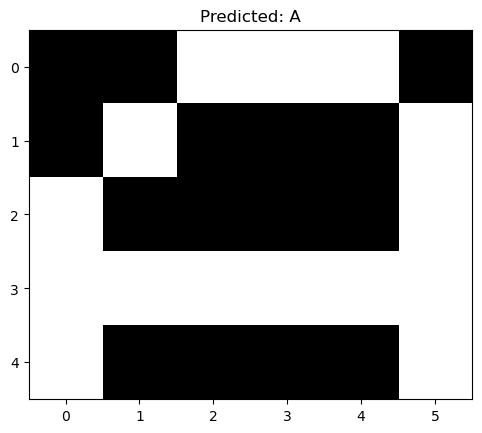

In [31]:
# Testing the Model
def predict(image):
    hidden_input = np.dot(image, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)

    return np.argmax(final_output)  # Get index of highest probability

# Example Test
test_image = letter_A
predicted_label = predict(test_image)

labels = ['A', 'B', 'C']
print(f"Predicted Letter: {labels[predicted_label]}")

# Display the test image
plt.imshow(test_image.reshape(5,6), cmap='gray')
plt.title(f"Predicted: {labels[predicted_label]}")
plt.show()
